In [1]:
!pip install nltk
!pip install xgboost
!pip install imbalanced-learn

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.2/124.9 MB 388.2 kB/s eta 0:05:22
   ---------------------------------------- 0.2/124.9 MB 320.0 kB/s eta 0:06:30
   ---------------------------------------- 0.2/124.9 MB 313.3 kB/s eta 0:06:38
   ---------------------------------------- 0.3/124.9 MB 254.3 kB/s eta 0:08:11
   ---------------------------------------- 0.4/124.9 MB 247.6 kB/s eta 0:08:23
   ---------------------------------------- 0.4/124.9 MB 218.5 kB/s eta 0:09:30
   ---------------------------------------- 0.5/124.9 MB 218.5 kB/s eta 0:09:30
   ---------------------------------------- 0.5/124.9 MB 225.8 kB/s eta 0:09:11
   ---------------------------------------- 0.6/124.9 MB 204.6 kB/s eta 0:10:08
   ---------------------------------------- 0.6/124.9 MB 188.6 kB/s eta 0:10:59
   ---------------------------------------- 0.6/124

In [2]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...


True

In [2]:
import pandas as pd
df = pd.read_csv("E:/Anaconda/ISEAR.csv", usecols=[0, 1], header=None)
df.columns = ['Emotion', 'Text']

In [3]:
def preprocess_text(text):
    text = text.replace('\n', '')
    tokens = word_tokenize(text)
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [31]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [32]:
X = df['Text']  # Kolom fitur
y = df['Emotion']  # Kolom label

In [33]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah label emosi menjadi angka

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  # Using bigrams
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train_vect, y_train)  # Menggunakan fitur yang sudah diproses
    y_pred = model.predict(X_test_vect)  # Menggunakan fitur yang sudah diproses
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')
    

Naive Bayes Accuracy: 0.5326
SVM Accuracy: 0.5494
Random Forest Accuracy: 0.5153


e:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:21:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5335


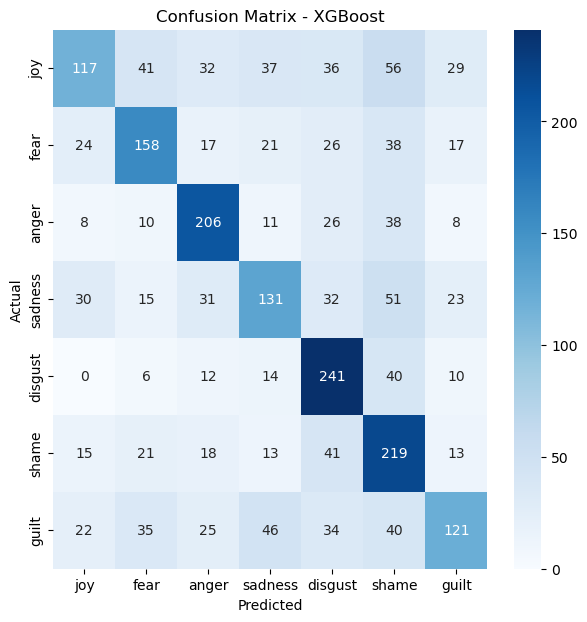

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique(), cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {name}')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
def predict_emotion(model, text):
    processed_text = preprocess_text(text)
    vect_text = vectorizer.transform([processed_text])
    return model.predict(vect_text)

# Example Prediction
test_sentence = "Aku sangat bahagia hari ini!"
print('Naive Bayes Prediction:', predict_emotion(models['Naive Bayes'], test_sentence))
print('SVM Prediction:', predict_emotion(models['SVM'], test_sentence))
print('Random Forest Prediction:', predict_emotion(models['Random Forest'], test_sentence))
print('XGBoost Prediction:', predict_emotion(models['XGBoost'], test_sentence))

Naive Bayes Prediction: [2]
SVM Prediction: [1]
Random Forest Prediction: [4]
XGBoost Prediction: [1]
